 # <center>Titanic Survival Statistics</center>

This document is desinged to assess 5 of the 7 factors that lead to a passenger's survival onboard the Titanic as per data collected  [here](https://www.kaggle.com/c/titanic/data).

Factors:
* Class
* Sex
* Age
* Family Onboard (Not inspected here)
* Ticket # (Not inspected here)
* Fare
* Embarkation

## Import Data

In [2]:
import unicodecsv
import pandas as pd
import matplotlib.pyplot as plt

# Allow plots to show inline in notebook
%matplotlib inline

# Read in CSV file. This definition is provided by Udacity.com, and is the only direct copy of outside code
def read_csv(filename):
    '''Returns a dictionary of the CSV file'''
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

tdata = read_csv('titanic_data.csv')

## Clean Data

In [3]:
def parse_ticket(ticket):
    '''Returns int: the numerical value of the ticket string. Returns "None" if ticket number not at end of string'''
    if ticket == '':
        return None
    else:
        ticket_reverse_split = ticket[::-1].split(' ', 1)
        ticket_num = ticket_reverse_split[0][::-1]
    try:
        return int(ticket_num)
    except:
        return None
    
def parse_int(number):
    '''Returns number string as int. Returns "None" if empty'''
    if number == "":
        return None
    return int(number)
    
def parse_float(number):
    '''Returns number string as float. Returns "None" if empty'''
    if number == "":
        return None
    return float(number) 

def parse_string(string):
    '''Returns empty string value as "None"'''
    if string == "":
        return None
    return string

# Clean up data in titanic data table
for data in tdata:
    data['Survived'] = parse_int(data['Survived'])
    data['Pclass'] = parse_int(data['Pclass'])
    data['Age'] = parse_float(data['Age'])
    data['SibSp'] = parse_int(data['SibSp'])
    data['Parch'] = parse_int(data['Parch'])
    data['Ticket'] = parse_ticket(data['Ticket'])
    data['Fare'] = parse_float(data['Fare'])
    data['Cabin'] = parse_string(data['Cabin'])
    data['Embarked'] = parse_string(data['Embarked'])


In [4]:
# Create DataFrame from cleaned data use with pandas
tdata_df = pd.DataFrame(tdata)

## Define Universal Functions for Data Analysis

In [5]:
# Define functions for simple analysis of data

def list_maker(data, key, value):
    '''Returns a subset of dataset with desired key value'''
    data_true = []
    for element in data:
        item = []
        if element[key] == value:
            data_true.append(element)
    return data_true

def list_maker_between(data, key, value_list):
    '''Returns a subset of dataset with key value between value_list. Value_list must be in the form [float1, float2]. Float1
    not included in calculation'''
    data_true = []
    for element in data:
        item = []
        if (element[key] > value_list[0]) and (element[key] <= value_list[1]):
            data_true.append(element)
    return data_true

def percent(part, whole):
    '''Returns float percent of part / whole'''
    return float(part)/float(whole)

def get_values(key, value):
    '''Returns 3 values from dataset in form: int(total), int(survivors), percent(float)'''
    key_total = list_maker(tdata, key, value)
    key_surv = list_maker(key_total, "Survived", 1)
    return len(key_total), len(key_surv), percent(len(key_surv), len(key_total))

def get_values_between(key, value_list):
    '''Returns 3 values from dataset in form: int(total), int(survivors), percent(float) where value_list must be in form
    [float1, float2]'''
    key_total = list_maker_between(tdata, key, value_list)
    key_surv = list_maker(key_total, "Survived", 1)
    return len(key_total), len(key_surv), percent(len(key_surv), len(key_total))

def print_survival(int_whole, int_part, float_per, string):
    '''Print survival stats: key_passengers, key_survivors, key_percent_survived'''
    print ("%s Passengers: " + str(int_whole)) % string
    print ("%s Survivors: " + str(int_part)) % string
    print ("Percent %s Survived: " + "%.2f" + "\n") % (string, float_per)
    
def plot_bar_values(per_list, labels_list, key):
    '''Plots a bar graph based on length of per_list which acts as yvalues. Each x value is labeled according to labels_list. 
    Title of graph based off key'''
    x_values = range(1, len(labels_list)+1)
    y_values = per_list

    plt.bar(x_values, y_values, align='center', width=.5)
    plt.xticks(x_values, labels_list)
    plt.ylabel("Survival Percentage")
    plt.title("Percent Survivors by %s" % key)

    plt.show()

# Mess Around with Numpy and Panda

In [41]:
#tdata_df["Age"].plot

#plt.show()

#age_surv = tdata_df.groupby(["Survived", "Age"], as_index=False).apply(lambda x: x).mean()
#print age_surv[["Age", "Survived"]]

#fare_surv = tdata_df.groupby(["Survived", "Fare"], as_index=False).apply(lambda x: x).mean()
#print age_surv[["Fare", "Survived"]]

age_surv = tdata_df.groupby(["Survived", "Age"], as_index=False).apply(lambda x: x)#.mean()
print age_surv[["Age", "Survived"]].dropna().mean()

fare_surv = tdata_df.groupby(["Survived", "Fare"], as_index=False).apply(lambda x: x)#.mean()
print fare_surv[["Fare", "Survived"]].dropna().mean()[1]

#age_surv = tdata_df.groupby(["Survived", "Age"], as_index=False).apply(lambda x: x)#.mean()
#print age_surv[["Age", "Survived"]]

Age         29.699118
Survived     0.406162
dtype: float64
0.383838383838


## Percent Sample Total Survived (PSTS)

In [7]:
# Generate survivor and not_survivor lists
survivors = list_maker(tdata, "Survived", 1)
not_survivors = list_maker(tdata, "Survived", 0)

# Find total number of passengers, survivors, and overall survival percent 
num_total = len(tdata)
num_surv = len(survivors)

# Print overall survival stats
print_survival(num_total, num_surv, percent(num_surv, num_total), "Sample Total")

print "Percent Sample Total Survived: %.2f" % tdata_df["Survived"].mean()
print len(tdata_df)

Sample Total Passengers: 891
Sample Total Survivors: 342
Percent Sample Total Survived: 0.38

Percent Sample Total Survived: 0.38
891


Analysis:

PSTS is calculated at 38%. This means a passenger chosen at random would have a 38% chance of survival. The rest of the analysis will compare and relate the PSTS to various factors as mentioned in the beginning.

## Percent Survivors by Class

In [8]:
# Inspect factor CLASS from key "Pclass"

# Get values for 
num_low, num_surv_low, num_low_per = get_values("Pclass", 3)
num_mid, num_surv_mid, num_mid_per = get_values("Pclass", 2)
num_up, num_surv_up, num_up_per = get_values("Pclass", 1)

# Print survival stats based on Class
print_survival(num_low, num_surv_low, num_low_per, "Lower Class")
print_survival(num_mid, num_surv_mid, num_mid_per, "Middle Class")
print_survival(num_up, num_surv_up, num_up_per, "Upper Class")

Lower Class Passengers: 491
Lower Class Survivors: 119
Percent Lower Class Survived: 0.24

Middle Class Passengers: 184
Middle Class Survivors: 87
Percent Middle Class Survived: 0.47

Upper Class Passengers: 216
Upper Class Survivors: 136
Percent Upper Class Survived: 0.63



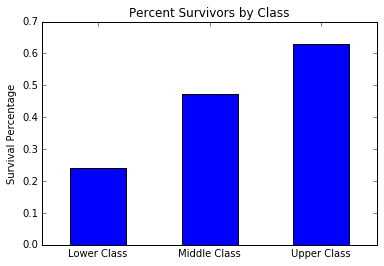

In [9]:
# Graph Percent Survivors by Class
plot_bar_values([num_low_per, num_mid_per, num_up_per ], ["Lower Class", "Middle Class", "Upper Class"], "Class")

Analysis CLASS:

Survival Percentage greatly increases with Class status. Both the Middle and Upper Classes are largely above the PSTS whereas the Lower class is far below the PSTS. This indicates a correlation between survival and Class; the higher the passeger's class the more likely they are to survive.

## Percent Survivors by Sex

In [10]:
# Inspect factor SEX from key "Sex"

# Get values
num_male, num_male_surv, num_male_per = get_values("Sex", "male")
num_female, num_female_surv, num_female_per = get_values("Sex", "female")

# Print stats 
print_survival(num_male, num_male_surv, num_male_per, "Male")
print_survival(num_female, num_female_surv, num_female_per, "Female")

Male Passengers: 577
Male Survivors: 109
Percent Male Survived: 0.19

Female Passengers: 314
Female Survivors: 233
Percent Female Survived: 0.74



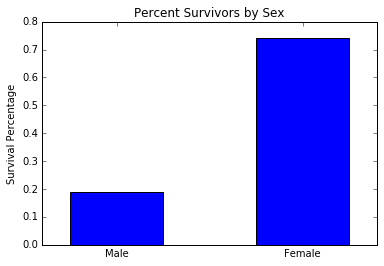

In [11]:
# Graph Percent Survivors by Sex
plot_bar_values([num_male_per, num_female_per], ["Male", "Female"], "Sex")

Analysis SEX:

Sex has the highest disparity between surviving and not surviving the Titanic. Being a woman onboard the Titanic DOUBLES the chance of survival, whereas being a male HALVES the chance.

## Percent Survivors by Age

In [12]:
# Inspect factor AGE from key "Age"
'''Although values in Age have estimates, all values besides None are treated as True Age'''

# Get Values
num_child, num_child_surv, num_child_per = get_values_between("Age", [0, 13])
num_young, num_young_surv, num_young_per = get_values_between("Age", [13, 18])
num_adult, num_adult_surv, num_adult_per = get_values_between("Age", [18, 50])
num_senior, num_senior_surv, num_senior_per = get_values_between("Age", [50, 100])

# Print Survival Stats for Fare
print_survival(num_child, num_child_surv, num_child_per, "Age (0,13]")
print_survival(num_young, num_young_surv, num_young_per, "Age (13,18]")
print_survival(num_adult, num_adult_surv, num_adult_per, "Age (18,50]")
print_survival(num_senior, num_senior_surv, num_senior_per, "Age (50,100]")

Age (0,13] Passengers: 71
Age (0,13] Survivors: 42
Percent Age (0,13] Survived: 0.59

Age (13,18] Passengers: 68
Age (13,18] Survivors: 28
Percent Age (13,18] Survived: 0.41

Age (18,50] Passengers: 511
Age (18,50] Survivors: 198
Percent Age (18,50] Survived: 0.39

Age (50,100] Passengers: 64
Age (50,100] Survivors: 22
Percent Age (50,100] Survived: 0.34



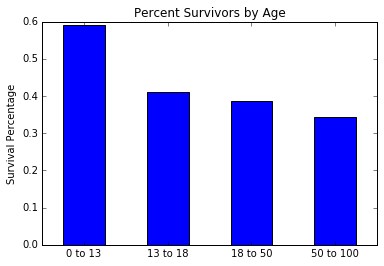

In [13]:
# Graph Percent Survivors by Age
plot_bar_values([num_child_per, num_young_per, num_adult_per, num_senior_per],["0 to 13","13 to 18","18 to 50","50 to 100"],
                "Age")

Analysis AGE:

Being a child up to the age of 13 onboard the Titanic increases survival by nearly 1.5 times the PSTS. All other age values have little to no effect on the chance of survival.

*As noted earlier, all values in AGE were used as presented in the dataset*

## Percent Survivors by Fare

In [14]:
# Inspect factor FARE from key "Fare"

# Find mean, std, and median of Fare
fare_mean = tdata_df["Fare"].mean()
fare_std = tdata_df["Fare"].std()
fare_median = tdata_df["Fare"].median()

print "Mean Fare: $" + "%.2f" % fare_mean
print "STD Fare: $" + "%.2f" % fare_std
print "Median Fare: $" + "%.2f" % fare_median

Mean Fare: $32.20
STD Fare: $49.69
Median Fare: $14.45


The median is close to half a standard deviation below the mean; this indicates data is heavily influenced by few, large outliers. Splitting Data into quartiles may be better for analysis.

In [15]:
# Generate quartile DataFrame based on Fare
fare_quartiles = tdata_df["Fare"].quantile([0, .25, .5, .75, 1])

# Create Quartile value_lists based on Fare
# Outer Lower Quartile = Top 0% - 25%
fare_olq = [fare_quartiles[0], fare_quartiles[.25]]
# Inner Lower Quartile = Top 25% - 50%
fare_ilq = [fare_quartiles[.25], fare_quartiles[.5]]
# Inner Upper Quartile = Top 50% - 75%
fare_iuq = [fare_quartiles[.5], fare_quartiles[.75]]
# Outer Upper Quartile = Top 75% - 100%
fare_ouq = [fare_quartiles[.75], fare_quartiles[1]]


In [16]:
# Get Values
num_fare_olq, num_fare_olq_surv, num_fare_olq_per = get_values_between("Fare", fare_olq)
num_fare_ilq, num_fare_ilq_surv, num_fare_ilq_per = get_values_between("Fare", fare_ilq)
num_fare_iuq, num_fare_iuq_surv, num_fare_iuq_per = get_values_between("Fare", fare_iuq)
num_fare_ouq, num_fare_ouq_surv, num_fare_ouq_per = get_values_between("Fare", fare_ouq)

# Print Survival Stats for Fare
print_survival(num_fare_olq, num_fare_olq_surv, num_fare_olq_per, "Outer Lower Quartile Fare")
print_survival(num_fare_ilq, num_fare_ilq_surv, num_fare_ilq_per, "Inner Lower Quartile Fare")
print_survival(num_fare_iuq, num_fare_iuq_surv, num_fare_iuq_per, "Inner Upper Quartile Fare")
print_survival(num_fare_ouq, num_fare_ouq_surv, num_fare_ouq_per, "Outer Upper Quartile Fare")

Outer Lower Quartile Fare Passengers: 208
Outer Lower Quartile Fare Survivors: 43
Percent Outer Lower Quartile Fare Survived: 0.21

Inner Lower Quartile Fare Passengers: 224
Inner Lower Quartile Fare Survivors: 68
Percent Inner Lower Quartile Fare Survived: 0.30

Inner Upper Quartile Fare Passengers: 222
Inner Upper Quartile Fare Survivors: 101
Percent Inner Upper Quartile Fare Survived: 0.45

Outer Upper Quartile Fare Passengers: 222
Outer Upper Quartile Fare Survivors: 129
Percent Outer Upper Quartile Fare Survived: 0.58



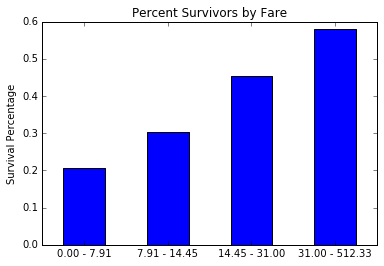

In [17]:
# Graph Percent Survivors by Fare
plot_bar_values([num_fare_olq_per, num_fare_ilq_per, num_fare_iuq_per, num_fare_ouq_per],
                ["%.2f - %.2f" % (fare_olq[0], fare_olq[1]),
                 "%.2f - %.2f" % (fare_ilq[0], fare_ilq[1]),
                 "%.2f - %.2f" % (fare_iuq[0], fare_iuq[1]),
                 "%.2f - %.2f" % (fare_ouq[0], fare_ouq[1])],
                "Fare")

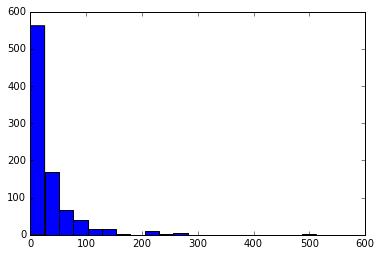

In [18]:
plt.hist(tdata_df["Fare"], bins=20)

plt.show()



Analysis FARE:

Passengers that paid more had a higher chance of survival. 

Note: FARE is likely directly related to CLASS; a higher class passenger could afford a higher fare.

## Percent Survivors by Embarkation

In [19]:
# Inspect factor EMBARKATION from key "Embarked"

# Get values
num_c, num_c_surv, num_c_per = get_values("Embarked", "C")
num_q, num_q_surv, num_q_per = get_values("Embarked", "Q")
num_s, num_s_surv, num_s_per = get_values("Embarked", "S")

# Print Survival Stats for port of Embarked
print_survival(num_c, num_c_surv, num_c_per, "Cherbourg")
print_survival(num_q, num_q_surv, num_q_per, "Queenstown")
print_survival(num_s, num_s_surv, num_s_per, "Southampton")

Cherbourg Passengers: 168
Cherbourg Survivors: 93
Percent Cherbourg Survived: 0.55

Queenstown Passengers: 77
Queenstown Survivors: 30
Percent Queenstown Survived: 0.39

Southampton Passengers: 644
Southampton Survivors: 217
Percent Southampton Survived: 0.34



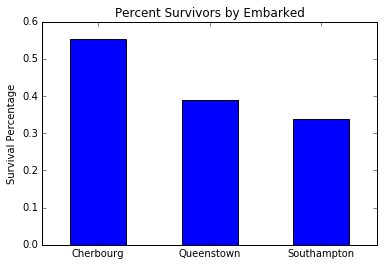

In [20]:
# Graph Percent Survivors by Embarked
plot_bar_values([num_c_per, num_q_per, num_s_per], ["Cherbourg", "Queenstown", "Southampton"], "Embarked")

Analysis EMBARKED:

Although survival rates of passengers from both Queenstown and Southampton appear to have little to no influence on the PSTS (about 1/1 ratio), passengers from Cherbourg did have a significant boost in survival percentage (just under ~1.5 times the PSTS).

### Overall Analysis:

Two Factors that were not calculated were Family Onboard (SIBSP) and Ticket # (TICKET). If SIBSP were to be calculated it would be based on 'if passenger has family onboard' as opposed to 'how much family onboard'; the dataset appears to have very few familes. TICKET has a vast array of unique values with differing ranges of digits and letters; although a function was written to dig out just the numbers it wasn't evidently clear how to approach analyzing TICKET in a sufficient way.

Strong factors that influenced survival were being wealthy (CLASS and FARE), a female (SEX), and being under the age of 13 (AGE); the most influencial factor was SEX. Although this information doesn't specify as to *why* those factors increased chance of survival, the practice of extracting women and children first was likely the cause. 

Cherbourg (EMBARKED) was a bit of a surprise. At first guess point of origination would have no influence of survival once everybody was on the boat. Perchance Cherbourg was significantly more affluent (CLASS and FARE), had more females as passengers (SEX), had more children as passengers (AGE), or truly was those at Cherbourg were better at surviving. 

If the data was to be further inspected FARE and CLASS would tested for correlation. There are some Middle and Lower Class children whose fare was more expensive than some of the Upper Class adults.

##### Extra Analysis: Percent Survival of a Wealthy, High Class, Young, Female from Cherbourg

In [21]:
# Grabbing all of the highest percents and seeing if survival is still high.

# Create list FARE (Upper Outer Quartile)
fare_ouq_list = list_maker_between(tdata, "Fare", fare_ouq)

# Modify list for AGE (child)
fare_age_list = list_maker_between(fare_ouq_list, "Age", [0, 13])

# Modify list for CLASS (upper)
fare_age_class_list = list_maker(fare_age_list, "Pclass", 1)

# Modify list for SEX
fare_age_class_sex_list = list_maker(fare_age_class_list, "Sex", "female")

# Modify list for EMBARKED
fare_age_class_sex_embarked_list = list_maker(fare_age_class_sex_list, "Embarked", "C")

# print length of list
print ("There were " + str(len(fare_age_class_sex_embarked_list)) +
       " wealthy, high class, young, females from Cherbourg onboard the Titanic")

There were 0 wealthy, high class, young, females from Cherbourg onboard the Titanic


This sample space doesn't have any anyone that fits the specifications. Going through the Data it appears class of young persons is all across the board. Let's exclude class.

In [22]:
# Modify fare_age_list for SEX
fare_age_sex_list = list_maker(fare_age_list, "Sex", "female")

# Modify list for EMBARKED
fare_age_sex_embarked_list = list_maker(fare_age_sex_list, "Embarked", "C")

# Check for survival
extra_analysis = list_maker(fare_age_sex_embarked_list, "Survived", 1)

# Print accounts that survived
print ("Of " + str(len(fare_age_sex_embarked_list)) + " wealthy, young, female passengers from Cherbourg onboard the Titanic " 
       + str(len(extra_analysis)) + " survived.")

Of 1 wealthy, young, female passengers from Cherbourg onboard the Titanic 1 survived.


Analysis *EXTRA ANALYSIS*:

100% of all wealthy, young, females from Cherbourg survived.. however there was only 1 passenger that fit this criteria. There is not enough sufficient information to to make any claims regarding this issue. 